In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans


# Load the dataset
df = pd.read_csv(r"C:\Users\bhara\Documents\Mall_Customers.csv")

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
    CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
 0           1    Male   19                  15              39
 1           2    Male   21                  15              81
 2           3  Female   20                  16               6
 3           4  Female   23                  16              77
 4           5  Female   31                  17              40)

In [11]:
# Dropping CustomerID as it's not needed for clustering
df_cleaned = df.drop(columns=['CustomerID'])

# Encoding 'Genre' (Male = 1, Female = 0)
label_encoder = LabelEncoder()
df_cleaned['Genre'] = label_encoder.fit_transform(df_cleaned['Genre'])

# Standardizing numerical features (Age, Annual Income, Spending Score)
scaler = StandardScaler()
df_cleaned[['Age', 'Annual_Income_(k$)', 'Spending_Score']] = scaler.fit_transform(df_cleaned[['Age', 'Annual_Income_(k$)', 'Spending_Score']])

# Display the processed dataset (first 5 rows)
df_cleaned.head()


,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


c:\Users\bhara\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\bhara\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\bhara\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bhara\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\bhara\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

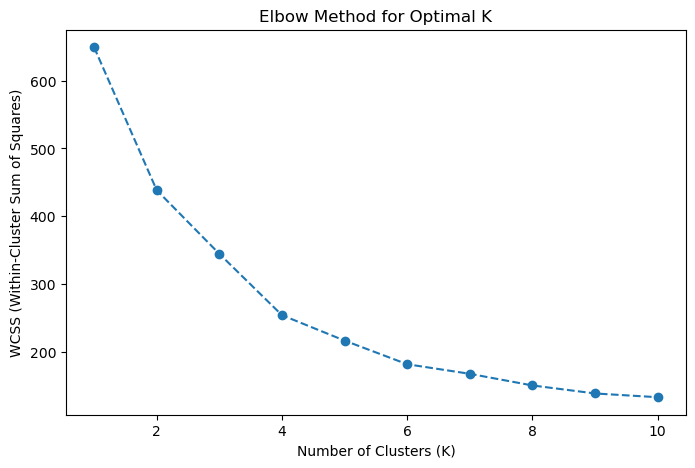

In [12]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [13]:
# Based on the Elbow Method, selecting the optimal number of clusters (K=5)
optimal_k = 5

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned)

# Display the clustered dataset (first 5 rows)
df_cleaned.head()


c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,-1.424569,-1.738999,-0.434801,2
1,1,-1.281035,-1.738999,1.195704,4
2,0,-1.352802,-1.700830,-1.715913,2
3,0,-1.137502,-1.700830,1.040418,4
4,0,-0.563369,-1.662660,-0.395980,2


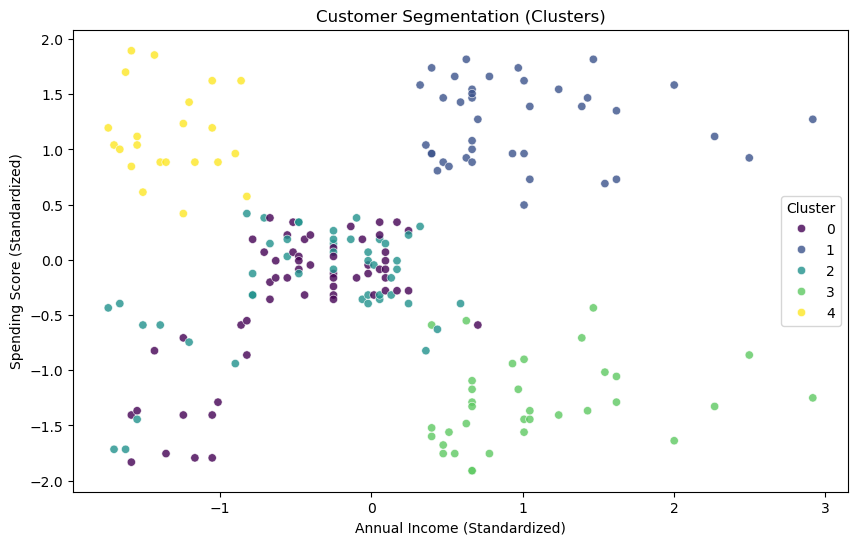

In [14]:
# Scatter plot of clusters using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cleaned["Annual_Income_(k$)"],
    y=df_cleaned["Spending_Score"],
    hue=df_cleaned["Cluster"],
    palette="viridis",
    alpha=0.8
)
plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.title("Customer Segmentation (Clusters)")
plt.legend(title="Cluster")
plt.show()
